# 데이콘 비트코인 트레이딩 모델 과정

## 구글 드라이브 마운트 및 파일 업로드







In [ ]:
# colab drive mount 
import os
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 폴더 path 설정 및 working directory 변경
folder_path = './drive/MyDrive'
os.chdir(folder_path)


# current working directory 확인
print(os.getcwd())
''' 정상 경로 : /content/drive/My Drive '''


# data uploading folder create
dir_name = 'bitcoin_dataset'

def make_dir(dir_name):
    try:
        # Create target Directory
        os.mkdir(dir_name)
        print("Directory " , dir_name ,  " Created ") 
    except FileExistsError:
        print("Directory " , dir_name ,  " already exists")

# 폴더 생성
make_dir(dir_name)

# 폴더 생성됬는 지 확인 
print(os.listdir())

# 업로드할 디렉토리 변경
os.chdir('./bitcoin_dataset/')

# current working directroy confirm
print(os.getcwd())

/content/drive/MyDrive
Directory  bitcoin_dataset  already exists
['Colab Notebooks', '산갱', 'somethings', '.ipynb_checkpoints', '블로그 방문관련 이슈 조사.gform', '제목 없는 설문지.gform', 'bitcoin_dataset']
/content/drive/MyDrive/bitcoin_dataset


In [ ]:
# dataset upload 
''' 업로드 아래로 해도 되긴 하는데, 너무 느려서 구글 드라이브 접속해서 직접 업로딩하는 걸 추천'''

print("구글 드라이브 링크 : {}".format('https://www.google.co.kr/drive/'))

'''
 uploaded = files.upload()

 for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
'''

구글 드라이브 링크 : https://www.google.co.kr/drive/


'\n uploaded = files.upload()\n\n for fn in uploaded.keys():\n    print(\'User uploaded file "{name}" with length {length} bytes\'.format(name=fn, length=len(uploaded[fn])))\n'

## 2. 시즌 1 2위팀 학습 모델 파일럿

In [ ]:
!pip install statsmodels==0.11.1
!pip install fbprophet==0.7.1

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA
import datetime
from fbprophet import Prophet


In [ ]:
# 데이터 확인
print(os.listdir())

# read file
train_x_df = pd.read_csv("./train_x_df.csv")
train_y_df = pd.read_csv("./train_y_df.csv")
print("Reading Complete!")

In [ ]:
# numpy arrary conversion

def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [ ]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)

In [ ]:
print(f'''

train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}

''')



train_x_array (7661, 1380, 10)
train_y_array (7661, 120, 10)




In [ ]:
# 샘플 확인

def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

In [ ]:
train_x_df[train_x_df['sample_id'] == 0]

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,0,1375,9,0.999015,0.999388,0.998400,0.998400,0.002577,20.899395,0.017492,0.001371,11.117771
1376,0,1376,9,0.998400,0.999260,0.998400,0.999016,0.001256,10.188805,0.011333,0.000556,4.510879
1377,0,1377,9,0.999018,0.999629,0.998936,0.999629,0.002902,23.543552,0.014289,0.001761,14.289263
1378,0,1378,9,0.999629,1.000116,0.999143,1.000000,0.004383,35.568905,0.020941,0.002810,22.806458


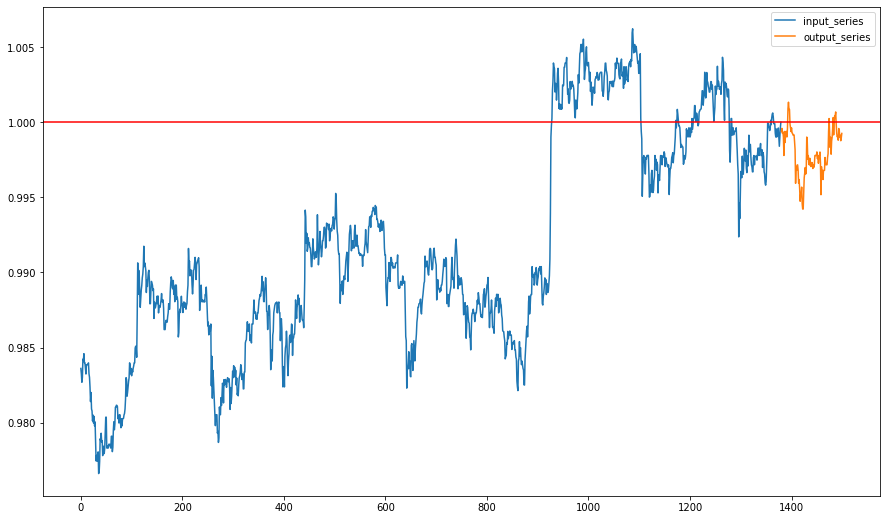

In [ ]:
# sample_id = 0, coin_index = 9에 해당하는 sample의 분단위 시가 변동 정보 시각화
idx = 0
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,1])
plt.show()

In [ ]:
data_col_idx = 1 # 1 open, 2 high

In [ ]:
# 임의의 sample set index
idx = 0

# open 가격만 가지고 arima 시행
x_series = train_x_array[idx,:,data_col_idx] 
y_series = train_y_array[idx,:,data_col_idx]

print(f'''

train_x_array {x_series.shape}
train_y_array {y_series.shape}

''')



train_x_array (1380,)
train_y_array (120,)




In [ ]:
x_series

array([0.98361421, 0.98324466, 0.98269397, ..., 0.99901819, 0.99962926,
       1.        ])

In [ ]:
# ARIMA model fitting : model arguments 는 임의인 듯.?

print("ARIMA 계수의미 : {}".format("https://otexts.com/fppkr/arima-forecasting.html"), end='\n')

model = ARIMA(x_series, order=(3,0,1))
fit  = model.fit()
pred_by_arima = fit.predict(1381,1380+120, typ='levels')

ARIMA 계수의미 : https://otexts.com/fppkr/arima-forecasting.html


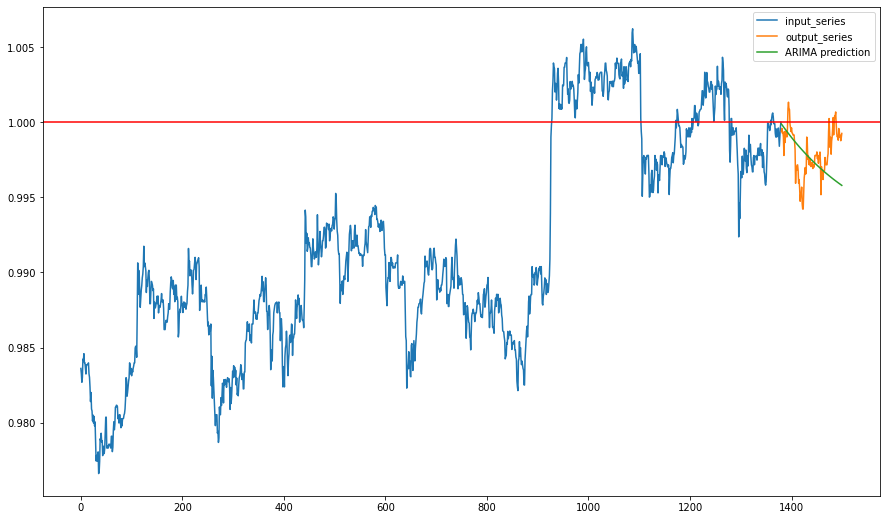

In [ ]:
# ARIMA 모델 결과
plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), pred_by_arima, label = 'ARIMA prediction')
#plt.plot(np.arange(1380, 1380+120), pred_y, label = 'Prophet prediction')
plt.legend()
plt.show()

In [ ]:

start_time = '2021-01-31 00:00:00'
start_dt = datetime.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

# datafram 만들기
x_df = pd.DataFrame()
# 분당 시간 데이터 시리즈 입력
x_df['ds'] = [start_dt + datetime.timedelta(minutes = time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
# 가격 데이터 시리즈 입력
x_df['y'] = x_series.tolist()


In [ ]:
# pprophet 모델 학습 
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=False, daily_seasonality=True,
                  changepoint_prior_scale=0.06)
prophet.fit(x_df)

arima 랑 prophet 관련 링크
Time Series Forecasting — ARIMA vs Prophet : 
https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a


facebook github : https://facebook.github.io/prophet/docs/quick_start.html
prophet 설명 블로그 : https://zzsza.github.io/data/2019/02/06/prophet/




In [ ]:
future_data = prophet.make_future_dataframe(periods=120, freq='min')
forecast_data = prophet.predict(future_data)


In [ ]:
# prophet은 이렇게 임의의 예측하려는 시간대 데이터를 생성해서 prediction 하는 듯.
future_data

In [ ]:
# 그리고 데이터 forecasting 하면 이렇게 뜸.
forecast_data

In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1495,2021-02-01 00:56:00,1.044539,1.026771,1.062108
1496,2021-02-01 00:57:00,1.045238,1.026883,1.063102
1497,2021-02-01 00:58:00,1.045943,1.027866,1.064366
1498,2021-02-01 00:59:00,1.046651,1.027429,1.064705
1499,2021-02-01 01:00:00,1.047365,1.027739,1.065840


In [ ]:
pred_by_prophet = forecast_data.yhat.values[-120:]

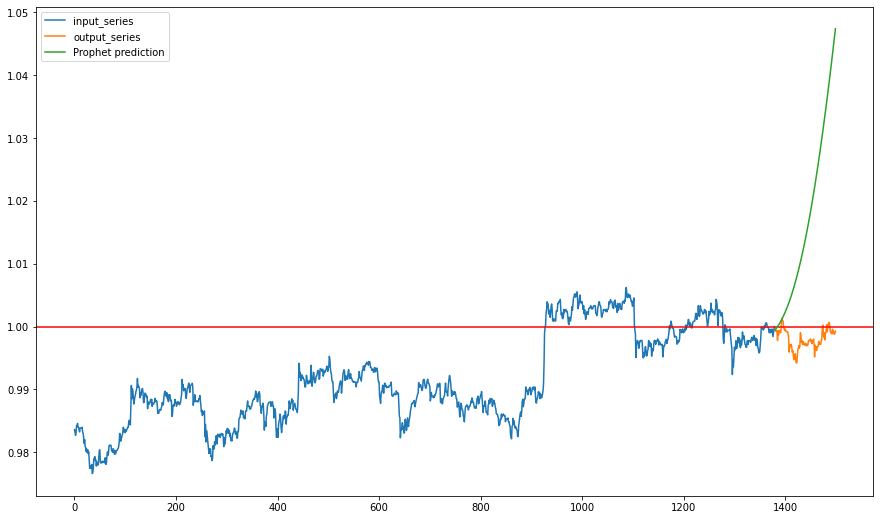

In [ ]:
plot_series(x_series, y_series)
#plt.plot(np.arange(1380, 1380+120), preds1, label = 'ARIMA prediction')
plt.plot(np.arange(1380, 1380+120), pred_by_prophet, label = 'Prophet prediction')
plt.legend()
plt.show()

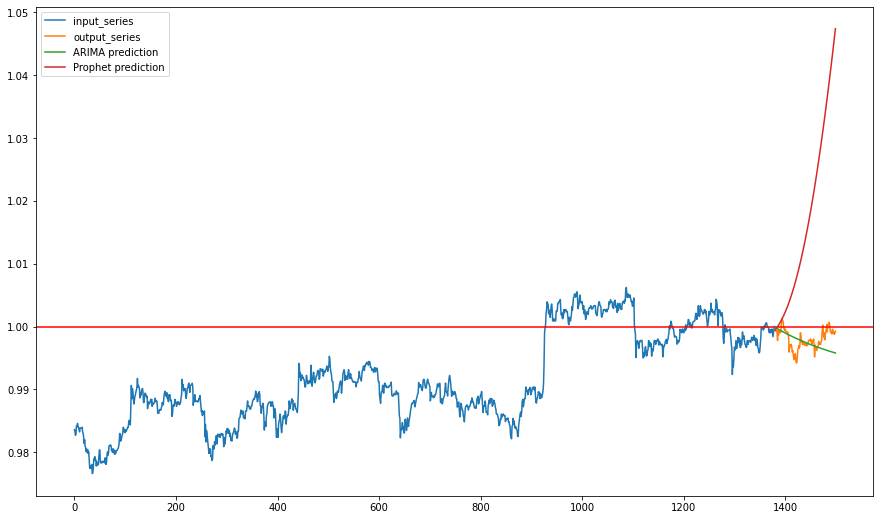

In [ ]:
plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), pred_by_arima, label = 'ARIMA prediction')
plt.plot(np.arange(1380, 1380+120), pred_by_prophet, label = 'Prophet prediction')
plt.legend()
plt.show()

## RNN 모델링

deep neural model은 다는 못하고, coin_index = 9, 비트코인에 해당되는 것만 돌려봄.

### library import

In [ ]:
# others
import pandas as pd
import numpy as np
import argparse
import datetime
from copy import deepcopy # Add Deepcopy for args
import pickle 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


print(torch.__version__)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)


1.8.1+cu101
Populating the interactive namespace from numpy and matplotlib


### data loading

In [ ]:
# read file
train_x_df = pd.read_csv("./train_x_df.csv")
train_y_df = pd.read_csv("./train_y_df.csv")

coin_9_x_df = train_x_df[train_x_df['coin_index'] ==  9]
coin_9_y_df = train_y_df[train_y_df['coin_index'] ==  9]

In [ ]:
 test_df = train_x_df[train_x_df['volume'] != 0]

In [ ]:
test_df['rest_asset'] = test_df['volume'] - test_df['tb_base_av']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_df['greedy'] = test_df['tb_base_av'] / test_df['volume']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_df2 = test_df[['time', 'coin_index', 'open', 'high', 'low', 'close', 'volume', 'trades', 'tb_base_av','rest_asset', 'greedy']]

In [ ]:
test_df2[['coin_index','trades', 'volume', 'tb_base_av','rest_asset', 'greedy']].head()

,coin_index,trades,volume,tb_base_av,rest_asset,greedy
0,9,0.009855,0.001334,0.000848,0.000486,0.635791
1,9,0.016137,0.001425,0.000697,0.000728,0.489180
2,9,0.014166,0.001542,0.000905,0.000636,0.587194
3,9,0.021557,0.002520,0.001171,0.001349,0.464522
4,9,0.021434,0.002818,0.001799,0.001019,0.638314


In [ ]:
test_df2[test_df2['greedy'] == 1][['coin_index','trades', 'volume', 'tb_base_av','rest_asset', 'greedy']].head()

,coin_index,trades,volume,tb_base_av,rest_asset,greedy
2929,4,40.257648,31704.576172,31704.576172,0.0,1.0
2992,4,50.322063,42596.621094,42596.621094,0.0,1.0
3070,4,26.838432,18679.884766,18679.884766,0.0,1.0
3097,4,23.483629,9658.816406,9658.816406,0.0,1.0
3112,4,23.483629,18480.273438,18480.273438,0.0,1.0


In [ ]:
# numpy arrary conversion

def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())

    # 2위 팀에서 임의로 넣어둠
    # sample_index = df_2d.sample_id.value_counts().index
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d



In [ ]:
coin_9_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [ ]:
coin_9_x_df.sample_id.value_counts().index

Int64Index([2047, 4408, 4409,  315, 6463, 1340, 2364, 4415, 3391, 7484,
            ...
            5805, 3760, 5812, 4785, 1716, 3765, 4791, 1717, 2743,    0],
           dtype='int64', length=1208)

In [ ]:
print(len(coin_9_x_df) / 1380)
print(len(coin_9_y_df) / 120)

1208.0
1208.0


In [ ]:
train_x_array = df2d_to_array3d(coin_9_x_df)
train_y_array = df2d_to_array3d(coin_9_y_df)

print(f'''

train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}

''')



train_x_array (1208, 1380, 10)
train_y_array (1208, 120, 10)




In [ ]:
train_x_array[0, 0, :]

array([9.00000000e+00, 9.83614206e-01, 9.83614206e-01, 9.83127594e-01,
       9.83245909e-01, 1.33405230e-03, 1.06509867e+01, 9.85464361e-03,
       8.48178868e-04, 6.77175522e+00])

In [ ]:
class DatasetGenerater(object):
    '''설명 : '''
    
    def __init__(self, dataframe, x_frames, y_frames):

        '''    
        : param dataframe:   Raw data to load for making dataset
        : param x_frames:    the number of input day size
        : param y_frames:    the number of output day size
        '''
        self.dataframe = dataframe
        self.x_frames = x_frames
        self.y_frames = y_frames

        check_null = self.dataframe.isna().sum().sum()
        print("null clear") if check_null == 0 else print("null exist")
        
        
    def __len__(self):
        return len(self.dataframe) - (self.x_frames + self.y_frames) + 1
    
    
    def __getitem__(self, idx):
        idx += self.x_frames
        
        dataframe = self.dataframe.iloc[idx-self.x_frames:idx+self.y_frames]
        dataframe = dataframe.values
        
        X = dataframe[:self.x_frames]
        y = dataframe[self.x_frames:]
        
        return X, y